In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

In [26]:
# 參數
L = 10
a = 3

# 使用 Geogebra找 y = (ℯ^(x)+ℯ^(-x))/2 + 1/cos(x) 的根
root = [1.87510, 
        4.69409,
        7.85476,
        10.99554]

# root = sqrt(omega)*L/a 求 eigen = sqrt(omega)/a 
eigen = []
omega = []
for r in root:
   eigen.append(r/L)
   omega.append((r*(a/L))**2)

In [27]:
def mode(x, eigen, A=2, B=-2):
    return A *(np.sin(eigen * x)-np.sinh(eigen * x) ) + B*(np.cos(eigen * x)-np.cosh(eigen * x) ) # mode F(x) 

def time(t, omega, C=1, D=1):
    return C * np.cos(omega * t) + D * np.sin(omega * t)  # particular G(t) 

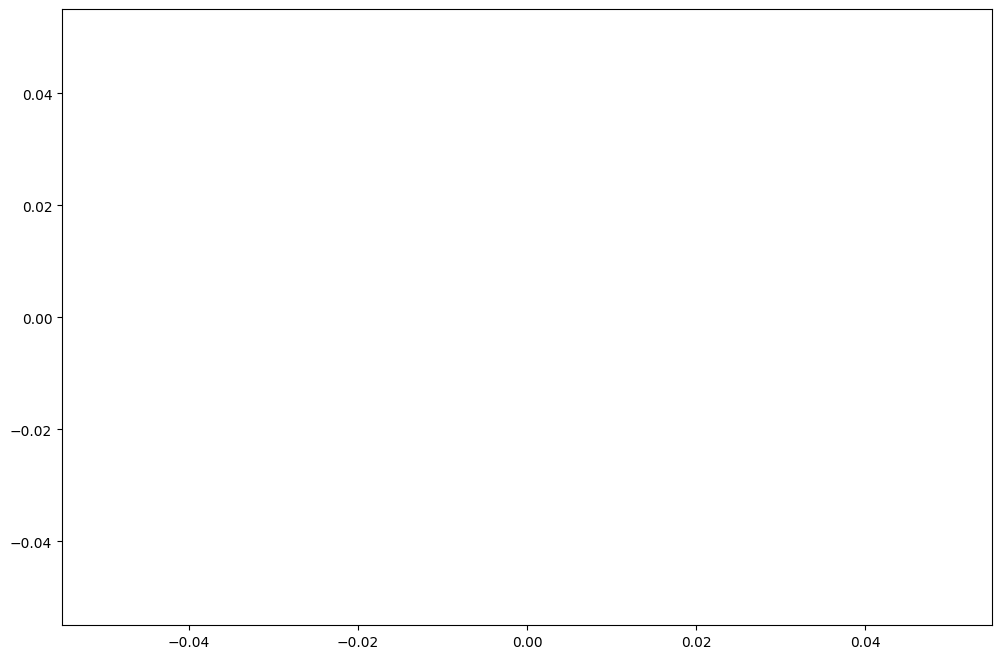

In [28]:
x_axis = np.linspace(0, L, 10000)   # x取值
frame = np.linspace(0, 2 * np.pi / omega[0], 500)  # t取值

# 繪製四個 modes
fig, ax = plt.subplots(figsize=(12, 8))
lines = [ax.plot([], [], label=f'mode {i + 1}, ω ≈ {omega[i]:.2f}')[0] for i in range(len(omega))]


In [29]:
def init():          #初始狀態
    ax.set_xlim(0, L)
    ax.set_ylim(-5.4, 5.4)  
    ax.set_title('Modes of Clamped-free beam')
    ax.set_xlabel('x')
    ax.set_ylabel('Displacement (arbitrary units)')
    ax.legend()
    return lines

def update(t):      #更新狀態
    for i in range(len(eigen)):
        ω = omega[i] 
        spatial = mode(x_axis, eigen[i]) 
        tempo = time(t, omega[i]) 
        y_axis = spatial * tempo   # u(x,t)=F(t)G(x)
        lines[i].set_data(x_axis, y_axis)
    return lines

In [ ]:
ani = FuncAnimation(fig, update, frames=frame, init_func=init, blit=True, interval=1500)
    
plt.show()
writer = PillowWriter(fps=30)
ani.save('clamped-free modes.gif', writer=writer)